In [23]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'


## Personal Info Exploratory Analysis for patients

In [24]:
#helper function that creates bar charts
def my_graph(parameters_title,pos_percentage,title):


    # Figure Size
    fig, ax = plt.subplots(figsize =(6, 2))

    # Horizontal Bar Plot
    ax.barh(parameters_title, pos_percentage,color=(0.2, 0.4, 0.6, 0.6))

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 1)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.9,
            alpha = 0.2)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.01, i.get_y()+0.4,
                str(round((i.get_width()), 2)),
                fontsize = 10, fontweight ='bold',
                color ='grey')

    # Add Plot Title
    ax.set_title(title,
                loc ='left', )

    # Show Plot
    plt.show()


In [25]:
%store -r patients_personalInfo

In [26]:
patients_personalInfo


,sex,age,education,family,occupation,income,nationality,nursing field,nursing days,safety evaluation,comments,age_group,nursing_days_group
0,2,30.0,8.0,3.0,1.0,2.0,2,1.0,5.0,5.0,oxi,20-40,0-5
1,2,72.0,4.0,3.0,3.0,1.0,1,2.0,7.0,3.0,Περιστέρια στον θάλαμο,60-80,5-10
2,2,58.0,3.0,3.0,1.0,1.0,1,2.0,6.0,5.0,oxi,40-60,5-10
3,2,71.0,1.0,3.0,3.0,1.0,1,2.0,7.0,5.0,Peristeria ston thalamo,60-80,5-10
4,2,72.0,1.0,3.0,3.0,1.0,1,2.0,7.0,5.0,peristeria ston thalamo,60-80,5-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,1,34.0,7.0,1.0,1.0,2.0,2,2.0,9.0,5.0,oxi,20-40,5-10
130,1,83.0,4.0,3.0,3.0,1.0,1,2.0,14.0,5.0,oxi,80-100,10-20
131,1,71.0,6.0,3.0,3.0,1.0,1,2.0,NaN,5.0,oxi,60-80,NaN
132,2,62.0,4.0,3.0,2.0,1.0,1,2.0,11.0,5.0,oxi,60-80,10-20


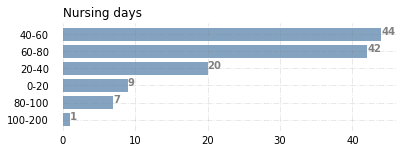

In [28]:
#NURSING DAYS

#split nursing days to classes
def get_num_people_by_age_category(df):
    df["nursing_days_group"] = pd.cut(x=df['nursing days'], bins=[0,5,10,20,50,100,200], labels=["0-5","5-10","10-20","20-50","50-100","100-200"])
    return df

patients_personalInfo = get_num_people_by_age_category(patients_personalInfo)

nursing_days = patients_personalInfo['nursing_days_group']

absolute_frequencies = nursing_days.value_counts()
relative_frequencies = nursing_days.value_counts(normalize=True)


par = ["40-60","60-80","20-40","0-20","80-100","100-200"]
title = "Nursing days"


my_graph(par,absolute_frequencies,title)

In [ ]:
patients_personalInfo

In [ ]:
# GENDER

gender = patients_personalInfo['sex']

absolute_frequencies = gender.value_counts()
relative_frequencies = gender.value_counts(normalize=True)

In [ ]:
relative_frequencies.index = ['Άνδρας','Γυναίκα']

In [ ]:
#plot relative_frequencies
colors = sns.color_palette("Paired", 3)

#define data
data = relative_frequencies
labels = relative_frequencies.index

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
# AGE

#split age to classes
def get_num_people_by_age_category(df):
    df["age_group"] = pd.cut(x=df['age'], bins=[0,20,40,60,80,100], labels=["0-20","20-40","40-60","60-80","80-100"])
    return df

patients_personalInfo = get_num_people_by_age_category(patients_personalInfo)


age = patients_personalInfo['age_group']


absolute_frequencies = age.value_counts()
relative_frequencies = age.value_counts(normalize=True)

In [ ]:
absolute_frequencies

In [ ]:
par = ["40-60","60-80","20-40","0-20","80-100"]
title = "Age Groups"


my_graph(par,absolute_frequencies,title)

In [ ]:
#EDUCATION

education = patients_personalInfo['education']

absolute_frequencies = education.value_counts()
relative_frequencies = education.value_counts(normalize=True)

In [ ]:
relative_frequencies

In [ ]:
#define data
data = relative_frequencies
labels = ['dimotiko',"lykeio","gymasio","iek","metptixiako"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#EDUCATION

family = patients_personalInfo['family']

absolute_frequencies = family.value_counts()
relative_frequencies = family.value_counts(normalize=True)

In [ ]:
#define data
data = relative_frequencies
labels = ["1","2","3"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#EDUCATION

occupation = patients_personalInfo['occupation']

absolute_frequencies = occupation.value_counts()
relative_frequencies = occupation.value_counts(normalize=True)

In [ ]:
#define data
data = relative_frequencies
labels = ["1","2","3"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#INCOME

income = patients_personalInfo['income']

absolute_frequencies = income.value_counts()
relative_frequencies = income.value_counts(normalize=True)

In [ ]:
#define data
data = relative_frequencies
labels = ["1","2"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#NATIONALITY

nationality = patients_personalInfo['nationality']

absolute_frequencies = nationality.value_counts()
relative_frequencies = nationality.value_counts(normalize=True)

In [ ]:
#define data
data = relative_frequencies
labels = ["1","2"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#NURSING FIELD

nursing_field = patients_personalInfo['nursing field']

absolute_frequencies = nursing_field.value_counts()
relative_frequencies = nursing_field.value_counts(normalize=True)

In [ ]:
#define data
data = relative_frequencies
labels = ["1","2"]

plt.pie(data, labels = labels, colors = colors, autopct='%0.f%%')
plt.show()

In [ ]:
#NURSING DAYS

nursing_field = patients_personalInfo['nursing days']

absolute_frequencies = nursing_field.value_counts()
relative_frequencies = nursing_field.value_counts(normalize=True)

In [ ]:
nursing_field

In [ ]:
absolute_frequencies